# Exploratory data analysis

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\Zimm\Desktop\Evoastra\British Airways\3bcbe6_03c8cdcc93024d4f8edcb01422acfce7.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.shape

(50000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [10]:
#Checking for datatypes
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [12]:
#Null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [14]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [16]:
print(df.describe())

       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%

# Feature Engineering

In [20]:
# Feature Engineering
df['flight_day_num'] = pd.to_datetime(df['flight_day'], format='%a').dt.dayofweek
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'booking_origin'], drop_first=True)
df['departure_city'] = df['route'].apply(lambda x: x[:3])
df['arrival_city'] = df['route'].apply(lambda x: x[-3:])
df = pd.get_dummies(df, columns=['departure_city', 'arrival_city'], drop_first=True)
df.drop(columns=['flight_day', 'route'], inplace=True)

In [22]:
print(df.head())

   num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  flight_day_num  ...  arrival_city_TGG  \
0             5.52                 0               0  ...             False   
1             5.52      

# Model Training

In [25]:
# Split the data into features and target
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [27]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [29]:
# Initialize the RandomForest classifier
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [31]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
# Predict on the test set
y_pred = model.predict(X_test)

# Model Evaluation

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [35]:
# Perform cross-validation to assess model stability
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

In [36]:
# Output the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print(f"Cross-Validation Accuracy: {cross_val_scores.mean()}")

Accuracy: 0.8525
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      8489
           1       0.54      0.17      0.26      1511

    accuracy                           0.85     10000
   macro avg       0.70      0.57      0.59     10000
weighted avg       0.82      0.85      0.82     10000

Cross-Validation Accuracy: 0.64882


# Visualize Feature Importance

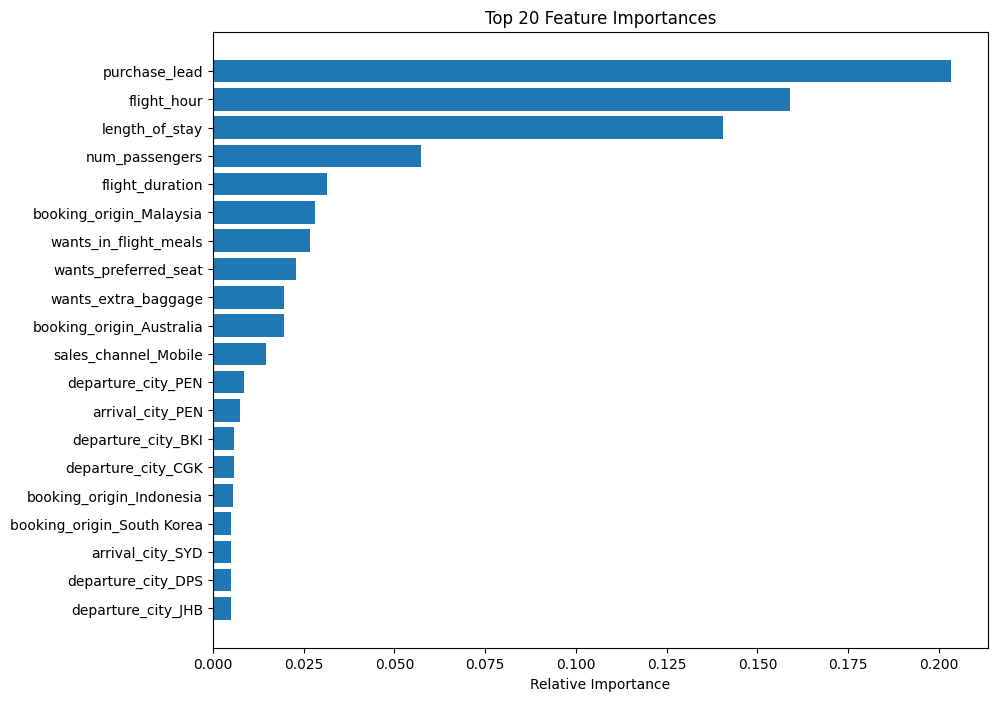

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importance from the trained model
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 important features

# Create a plot
plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
